In [3]:
import numpy as np
import pandas as pd
# This is the library for the Reservoir Computing got it by: https://github.com/cknd/pyESN
from pyESN import ESN
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

In [4]:
df = pd.read_csv('train.csv', sep=',')

df


,Unnamed: 0,Date,Close/Last,Volume,Open,High,Low,NextOpen,Company,ID
0,4121,2/17/17,$133.53,12265480,$133.50,$134.09,$133.17,$133.50,SHARE B,4121
1,2013,3/11/19,"$1,670.62",3797298,"$1,626.12","$1,672.29","$1,626.01","$1,669",SHARE C,2013
2,6016,7/29/16,$26.05,110791880,$26.05,$26.14,$25.92,$26.10,SHARE D,6016
3,13054,6/16/16,$11.89,24626072,$11.75,$11.91,$11.64,$11.90,Company H,13054
4,3053,5/18/21,$309.96,14522400,$315.59,$316.50,$309.81,$304.19,SHARE B,3053
...,...,...,...,...,...,...,...,...,...,...
11679,9225,1/23/18,$91.90,23014000,$91.90,$92.30,$91.54,$92.55,SHARE F,9225
11680,13123,3/9/16,$7.93,22278412,$8.01,$8.02,$7.83,$7.98,Company H,13123
11681,9845,8/6/15,$46.62,27344040,$47.71,$47.77,$46.33,$46.39,SHARE F,9845
11682,10799,10/26/18,$66.18,136901100,$61.65,$67.98,$61.33,$67.49,SHARE G,10799


In [5]:
df = pd.read_csv('train.csv', sep=',')

cols = ["Close/Last", "Open", "High", "Low", "NextOpen"]
df[cols] = df[cols].replace({'\$': '', ' ': '', ',': ''}, regex=True) # removes $ , and spaces
# stocks = df.sort_values(by = [8, 9], kind = "mergesort") # sorts by company --> by id
# stocks = stocks.to_numpy()
#print(df.head())
df = df.apply(pd.to_numeric, errors='ignore', downcast='float')

stocks = df.sort_values(by = ["Company"], kind = "mergesort") 

In [7]:
n_reservoir = 500
sparsity = 0.2
rand_seed = 23
spectral_radius = 1.2
noise = .0005


esn = ESN(n_inputs = 1,
      n_outputs = 1, 
      n_reservoir = n_reservoir,
      sparsity = sparsity,
      random_state = rand_seed,
      spectral_radius = spectral_radius,
      noise = noise)

In [8]:
stonk = [] # list of data frames 0-9 for 10 companies
company_list = [] # list of companies (10)
# company_list=stocks['Company'].unique().tolist()

for company, stockCompany in stocks.groupby('Company'):
    company_list.append(company)
    stonk.append(stockCompany)

In [74]:
trainlen = 1000
future = 1
futureTotal = 100
pred_tot = np.zeros(futureTotal)

In [78]:
for i in stonk:
    i['Date'] = pd.to_datetime(i['Date'])
    i['Date'] = i['Date'].dt.strftime('%Y-%m-%d')
    i = i.iloc[:, 1:]
    i = i.sort_values(by = 'Date')
    i = i.set_index('Date')
# stonk

In [10]:
companyH = stonk[0] # company H
companyH['Date'] = pd.to_datetime(companyH['Date'])
companyH['Date'] = companyH['Date'].dt.strftime('%Y-%m-%d')
companyH = companyH.iloc[:, 1:]
companyH = companyH.sort_values(by = 'Date')
companyH = companyH.set_index('Date')
companyH

,Close/Last,Volume,Open,High,Low,NextOpen,Company,ID
Date,,,,,,,,
2015-09-25,5.900000,36968272.0,5.930000,6.020000,5.850000,5.90,Company H,13236.0
2015-09-29,5.930000,38067892.0,5.890000,5.940000,5.810000,5.98,Company H,13234.0
2015-09-30,6.160000,55634440.0,5.980000,6.170000,5.950000,6.16,Company H,13233.0
2015-10-01,6.040000,48832120.0,6.160000,6.180000,5.870000,6.01,Company H,13232.0
2015-10-02,6.200000,38611520.0,6.010000,6.200000,5.950000,6.24,Company H,13231.0
...,...,...,...,...,...,...,...,...
2022-02-18,236.419998,76125488.0,246.679993,249.860001,231.000000,230.35,Company H,11624.0
2022-02-23,223.869995,56651080.0,238.020004,241.550003,223.009995,210.15,Company H,11622.0
2022-02-25,241.570007,52886552.0,237.210007,242.169998,233.809998,239.92,Company H,11620.0


In [11]:
companyH.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1094 entries, 2015-09-25 to 2022-03-04
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close/Last  1094 non-null   float32
 1   Volume      1094 non-null   float32
 2   Open        1094 non-null   float32
 3   High        1094 non-null   float32
 4   Low         1094 non-null   float32
 5   NextOpen    1094 non-null   object 
 6   Company     1094 non-null   object 
 7   ID          1094 non-null   float32
dtypes: float32(6), object(2)
memory usage: 51.3+ KB


In [12]:
companyH.isna().any()

Close/Last    False
Volume        False
Open          False
High          False
Low           False
NextOpen      False
Company       False
ID            False
dtype: bool

<AxesSubplot:xlabel='Date'>

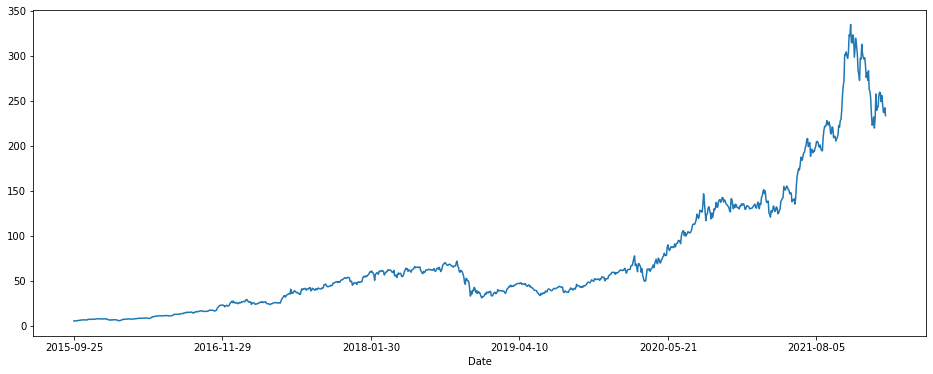

In [79]:
companyH['Open'].plot(figsize=(16,6))

In [14]:
companyH_training_set = companyH['Open']
companyH_training_set = pd.DataFrame(companyH_training_set)

In [15]:
companyH.isna().any()

Close/Last    False
Volume        False
Open          False
High          False
Low           False
NextOpen      False
Company       False
ID            False
dtype: bool

In [16]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
scaled_training_set = sc.fit_transform(companyH_training_set)

In [66]:
scaled_training_set

array([[1.2147613e-04],
       [0.0000000e+00],
       [2.7332455e-04],
       ...,
       [7.0250243e-01],
       [7.1893215e-01],
       [6.9226795e-01]], dtype=float32)

In [17]:
len(companyH_training_set)

1094

In [62]:
trainlen = len(companyH_training_set)
future = 1
train = companyH_training_set.to_numpy()
pred_training = esn.fit(np.ones(trainlen),train[:trainlen])

In [63]:
prediction = esn.predict(np.ones(future))

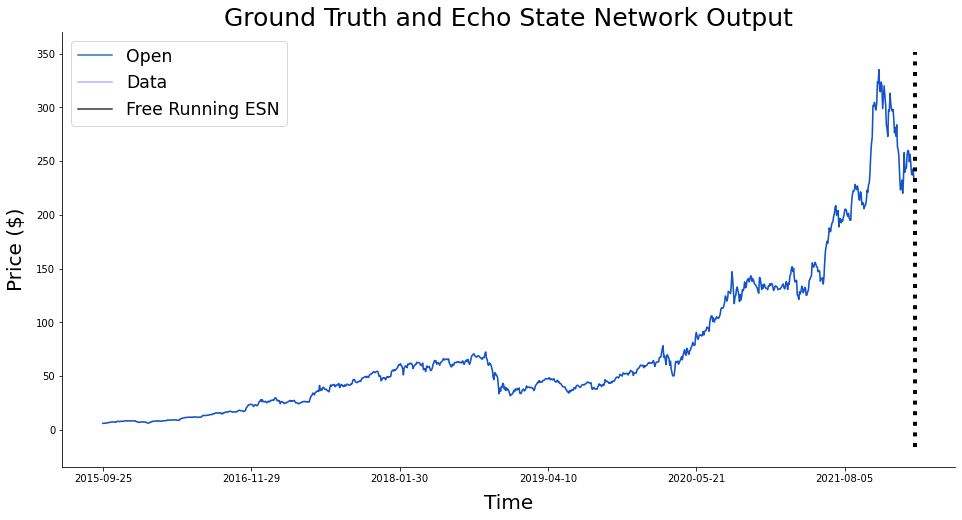

In [64]:
plt.figure(figsize=(16,8))
companyH['Open'].plot()
plt.plot(range(0,trainlen),train[0:trainlen],'b',label="Data", alpha=0.3)
#plt.plot(range(0,trainlen),pred_training,'.g',  alpha=0.3)
plt.plot(range(trainlen,trainlen+future), pred_tot,'k',  alpha=0.8, label='Free Running ESN')

lo,hi = plt.ylim()
plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:', linewidth=4)

plt.title(r'Ground Truth and Echo State Network Output', fontsize=25)
plt.xlabel(r'Time', fontsize=20,labelpad=10)
plt.ylabel(r'Price ($)', fontsize=20,labelpad=10)
plt.legend(fontsize='xx-large', loc='best')
sns.despine()

In [65]:
# prediction for the next day after learning the entire set
prediction

array([[234.78575755]])